In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('D:/Data Science/Assignment/07Clustring/crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

There is no null values so no need of imputation

In [4]:
x=df.iloc[:,1:].values

In [5]:
#find scaling
sc_x = StandardScaler()
x=sc_x.fit_transform(x)

In [6]:
#wcss to selact optimum number of cluster
wcss=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


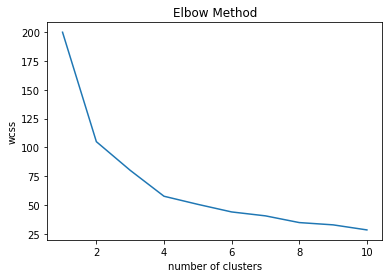

In [7]:
#visulization
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

## From elbow chart we conclud that we should go for 2 or 4 cluster

In [8]:
kmeans=KMeans(n_clusters=4,random_state=1)
kmeans.fit(x)
df['cluster']=kmeans.labels_

In [9]:
df[df['cluster']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
12,Illinois,10.4,249,83,24.0,0
19,Maryland,11.3,300,67,27.8,0
21,Michigan,12.1,255,74,35.1,0
24,Missouri,9.0,178,70,28.2,0
27,Nevada,12.2,252,81,46.0,0


In [10]:
df[df['cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
3,Arkansas,8.8,190,50,19.5,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [11]:
df[df['cluster']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2


In [12]:
df[df['cluster']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
10,Hawaii,5.3,46,83,20.2,3
13,Indiana,7.2,113,65,21.0,3
15,Kansas,6.0,115,66,18.0,3
20,Massachusetts,4.4,149,85,16.3,3
29,New Jersey,7.4,159,89,18.8,3
34,Ohio,7.3,120,75,21.4,3
35,Oklahoma,6.6,151,68,20.0,3
36,Oregon,4.9,159,67,29.3,3


In [13]:
df[df['cluster']==4]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster


In [14]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,10.815385,257.384615,76.000000,33.192308
1,13.937500,243.625000,53.750000,21.412500
2,3.600000,78.538462,52.076923,12.176923
3,5.656250,138.875000,73.875000,18.781250


from clusters we can see there is no much distiction between 0 and 1. because avrage max murder in 1 and avrage max assult in 0 and its same for rape. so we go with cluster 3

In [15]:
kmeans= KMeans(n_clusters=3,random_state=1)
kmeans.fit(x)
df['cluster']=kmeans.labels_

In [16]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.656250,138.875,73.875000,18.78125
1,12.165000,255.250,68.400000,29.16500
2,3.971429,86.500,51.928571,12.70000


# Conclusion

Clusters have maximum and minimum avg of crime(murder,rape,assault) as well as minimum and maximum avg population.Reason for this type of result may be the population less will be the resources,or more will be the disparity bw individuals ,this may lead to high crime.